<a href="https://colab.research.google.com/github/Ruqyai/ds/blob/master/unit3/predictive-modeling-classification/demo_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np ###
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer ###
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz  # Visualization

import warnings

# disable warnings
warnings.filterwarnings("ignore")



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/predictive-modeling-classification/weatherAUS.csv

dataset = pd.read_csv('weatherAUS.csv')

dataset.head()

--2020-06-17 10:02:22--  https://raw.githubusercontent.com/codeforgirls-sa/ds/master/unit3/predictive-modeling-classification/weatherAUS.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14167326 (14M) [text/plain]
Saving to: ‘weatherAUS.csv’

weatherAUS.csv      100%[===================>]  13.51M  29.1MB/s    in 0.5s    

2020-06-17 10:02:22 (29.1 MB/s) - ‘weatherAUS.csv’ saved [14167326/14167326]



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


#EDA & Preprocessing

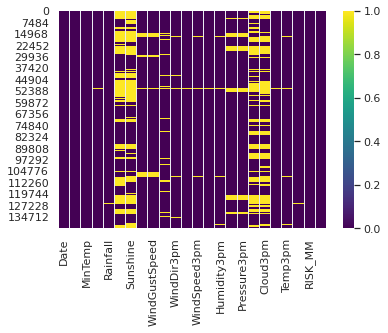

In [3]:
# check if there is any missing value
sns.set()
sns.heatmap(dataset.isnull(), cmap='viridis')
# plt.show()


In [4]:
# remove missing values in numeric columns
#imputer = SimpleImputer(missing_values='NaN', strategy='mean', axis=0)
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, verbose=0, copy=True) ###
df_num_col = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am",
              "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm",
              "Temp9am", "Temp3pm"]

data_num = dataset[df_num_col]
imputer = imputer.fit(data_num)
dataset[df_num_col] = imputer.transform(data_num)

In [5]:
# Use encoder for categorical variables
label_encoder = LabelEncoder()
df_cat_col = ["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow", "Date", "Location"]

# Update NaN values by NA
data_cat = dataset[df_cat_col].fillna('NA')

# Loop through each categorical variable and update values using LabelEncoder
# - remove missing values in categorical columns
for i in range(len(data_cat.columns)):
    data_cat.iloc[:, i] = label_encoder.fit_transform(data_cat.iloc[:, i])

dataset[df_cat_col] = data_cat

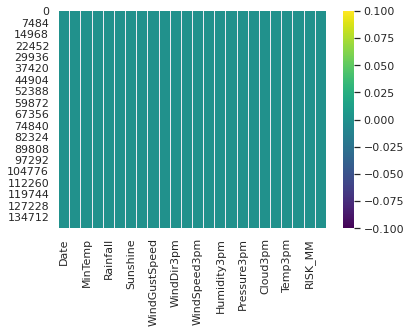

In [6]:
# check if there is any missing value
sns.set()
sns.heatmap(dataset.isnull(), cmap='viridis')
# plt.show()

#Feature Engineering

In [7]:
# We need to remove RISK_MM because we want to predict 'RainTomorrow' and RISK_MM can leak some info to our model
dataset = dataset.drop('RISK_MM', axis=1)


#Predictive Modeling

In [8]:
# split dataset in features and target variable
features = dataset.iloc[:, 0:22].values
target = dataset.iloc[:, 22].values

# Split dataset into training set and test set 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)

# Create Decision Tree classifier object
clf = DecisionTreeClassifier(random_state=0, max_depth=8)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

#Predictive Evaluation

In [9]:

print("Accuracy:", accuracy_score(y_test, y_pred)*100)


Accuracy: 84.01237751418257


#Result Visualization

In [10]:
export_graphviz(clf, out_file='tree_classifier.dot',
                feature_names=["Date", "Location", "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
                               "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm", "WindSpeed9am",
                               "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am",
                               "Cloud3pm", "Temp9am", "Temp3pm", "RainToday"],
                class_names=["Yes", "No"])

In [11]:
# Open Terminal:  dot -Tpng tree_classifier.dot -o tree_classifier.png => save it as png
# Samples = how many sample in the node
# Values = are class probabilities
!dot -Tpng tree_classifier.dot -o tree_classifier.png

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.831629 to fit
